In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
#load the dataset
df = pd.read_csv('bank-full.csv', delimiter=';')

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: xlabel='job'>

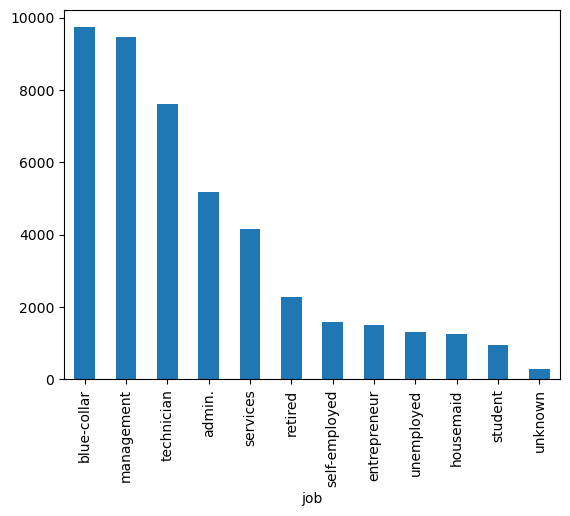

In [6]:
df['job'].value_counts().plot(kind='bar')


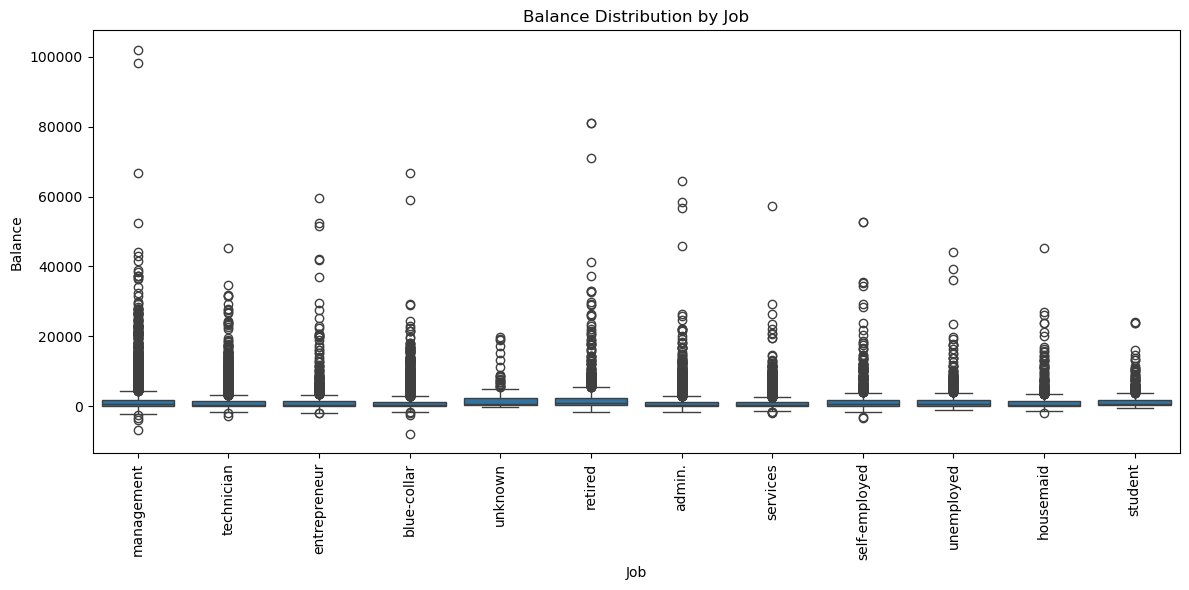

In [18]:
# Job vs. Balance
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job', y='balance')
plt.title('Balance Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

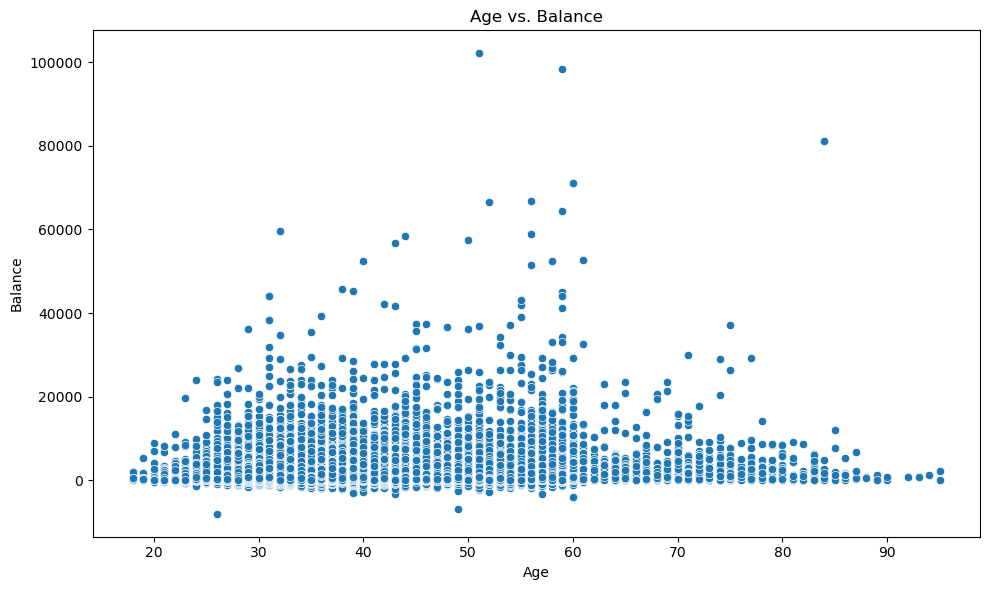

In [20]:
# Age vs. Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='balance')
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.tight_layout()
plt.show()

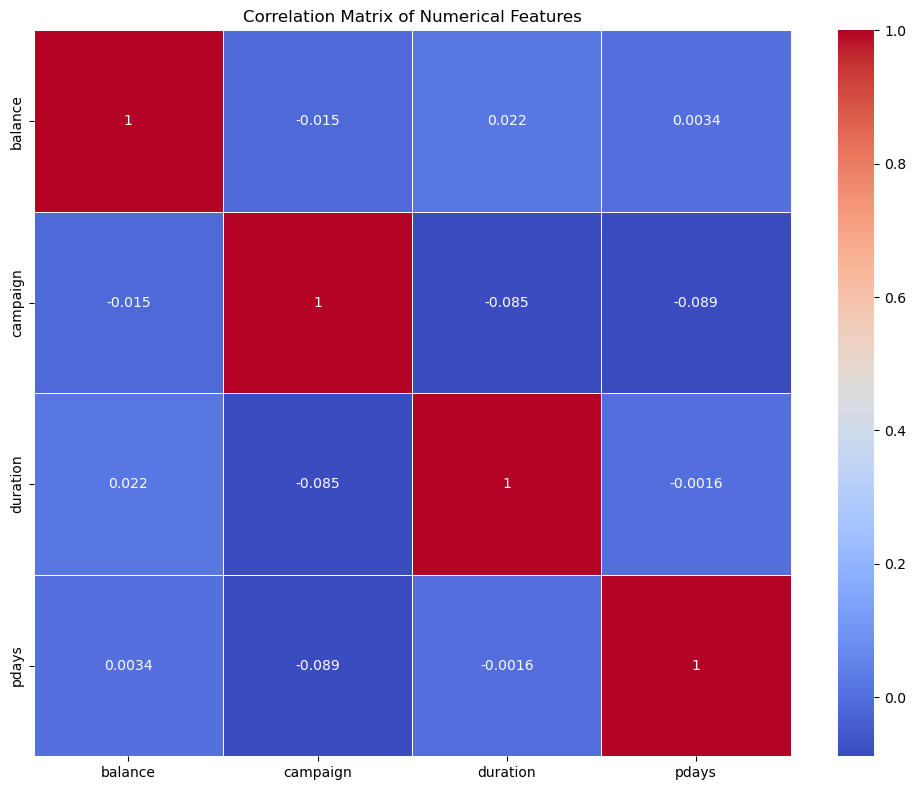

In [22]:
# Select numerical features
numerical_features = ['balance', 'campaign', 'duration', 'pdays']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


In [24]:
# Select 7 features
selected_features = ['education', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'job']

# Ensure the features are in the DataFrame
df = df[selected_features + ['y']]  # Add the target variable 'y' to the DataFrame

# Sample 1,000 data points
df_sampled = df.sample(n=1000, random_state=42)

# Encode the target variable
df_sampled['y'] = df_sampled['y'].apply(lambda x: 1 if x == 'yes' else 0)

# One-hot encode categorical features
categorical_features = ['education', 'job']
df_sampled = pd.get_dummies(df_sampled, columns=categorical_features, drop_first=True)




In [26]:
# Split the data into features (X) and target (y)
X = df_sampled.drop('y', axis=1)
y = df_sampled['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.835
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       169
           1       0.25      0.03      0.06        31

    accuracy                           0.83       200
   macro avg       0.55      0.51      0.48       200
weighted avg       0.75      0.83      0.78       200

Confusion Matrix:
[[166   3]
 [ 30   1]]


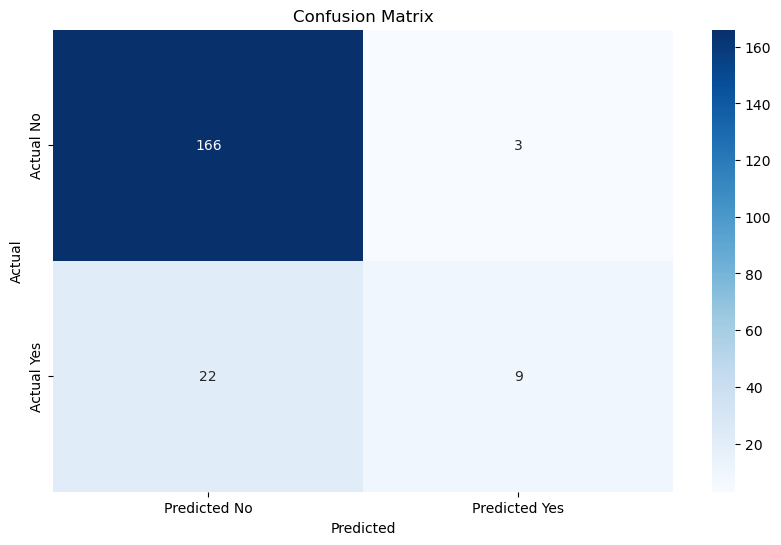

In [48]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


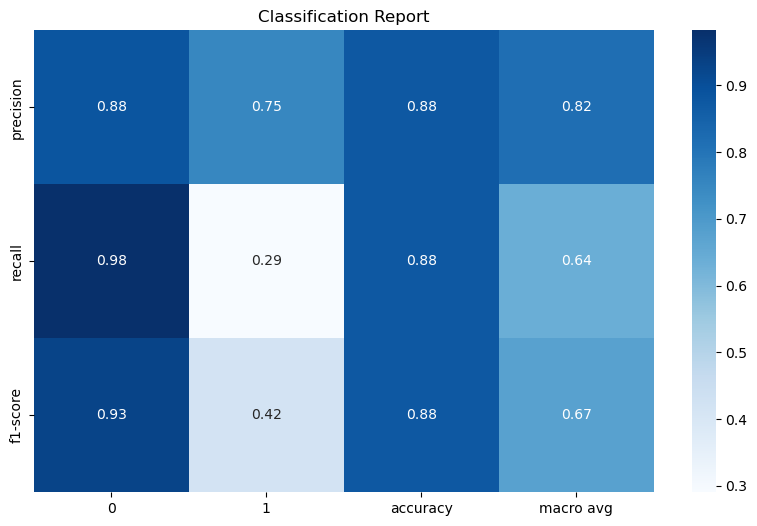

In [50]:
# Generate classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()


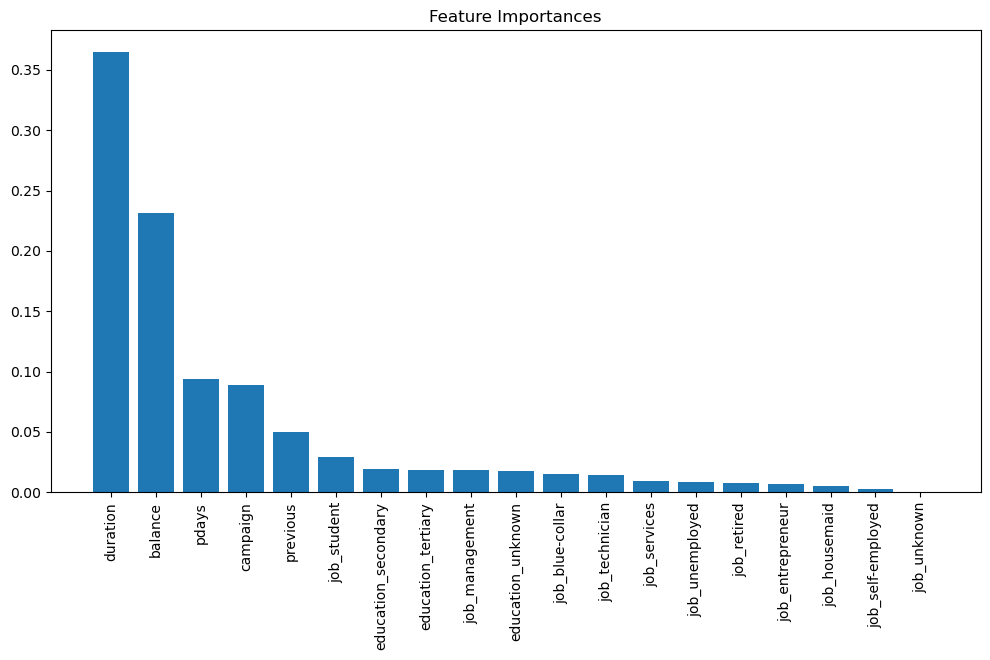

In [54]:
# Feature importance from the RandomForest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features_names = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features_names[indices], rotation=90)
plt.show()


In [28]:
# Select 7 features
selected_features = ['education', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'job']

# Ensure the features are in the DataFrame
df = df[selected_features + ['y']]  # Add the target variable 'y' to the DataFrame

# Sample 1,000 data points
df_sampled = df.sample(n=1000, random_state=42)

# Encode the target variable
df_sampled['y'] = df_sampled['y'].apply(lambda x: 1 if x == 'yes' else 0)

# One-hot encode categorical features
categorical_features = ['education', 'job']
df_sampled = pd.get_dummies(df_sampled, columns=categorical_features, drop_first=True)




In [38]:
# Split the data into features (X) and target (y)
X = df_sampled.drop('y', axis=1)
y = df_sampled['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=200)
log_reg_model.fit(X_train, y_train)

# Generate predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       169
           1       0.75      0.29      0.42        31

    accuracy                           0.88       200
   macro avg       0.82      0.64      0.67       200
weighted avg       0.86      0.88      0.85       200

Confusion Matrix:
[[166   3]
 [ 22   9]]


C:\Users\awofe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


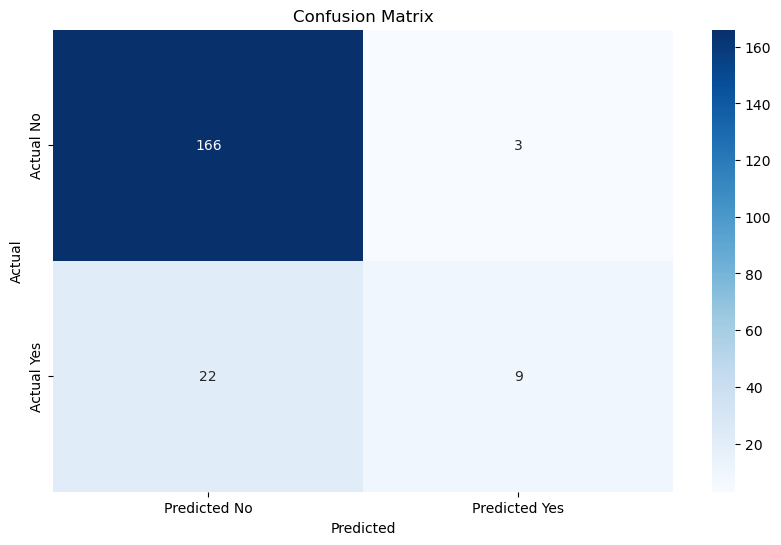

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


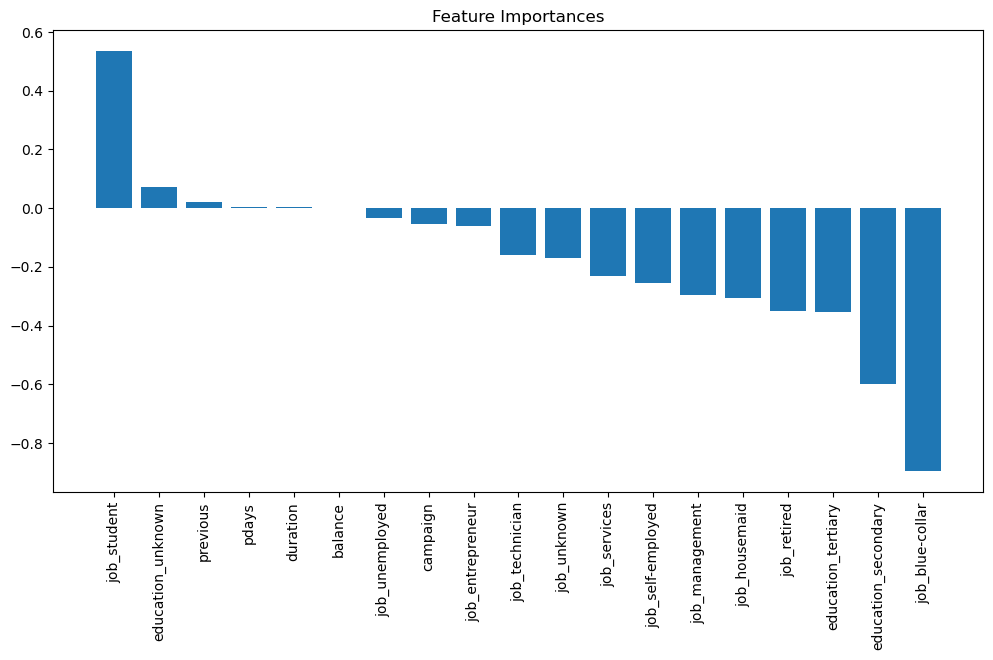

In [60]:
# Get feature importance from the logistic regression coefficients
importances = log_reg_model.coef_[0]
indices = np.argsort(importances)[::-1]
features_names = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features_names[indices], rotation=90)
plt.show()
